<a href="https://colab.research.google.com/github/daheeem/Ensemble-Learning/blob/main/Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Forest

# Library

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
import datetime
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  

# Data

upload data *german_credit.xlsx*

In [ ]:
from google.colab import files
TheFile = files.upload()

Saving german_credit.xlsx to german_credit.xlsx


tabel dataset

In [ ]:
df = pd.read_excel(r'german_credit.xlsx')
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2023-02-03 00:00:00,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2023-02-03 00:00:00,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2023-02-03 00:00:00,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


Informasi dataset

In [ ]:
df.info()

#Prepocessing

Missing value

In [ ]:
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

### Replace

Mereplace semua enties menjadi integer

In [ ]:
df['status'] = df['status'].replace(['... < 0 DM', '0<= ... < 200 DM', '... >= 200 DM / salary for at least 1 year', 'no checking account'], [0, 1, 2, 3])

df['credit_history'] = df['credit_history'].replace(['no credits taken/all credits paid back duly', 'all credits at this bank paid back duly', 'existing credits paid back duly till now','delay in paying off in the past','critical account/other credits elsewhere'], [0, 1, 2, 3 , 4])

df['purpose'] = df['purpose'].replace(['car (new)', 'car (used)', 'furniture/equipment', 'radio/television', 'domestic appliances', 'repairs', 'education','vacation', 'retraining', 'business', 'others'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

df['savings'] = df['savings'].replace(['... <  100 DM', '100 <= ... <  500 DM', '500 <= ... < 1000 DM', '... >= 1000 DM', 'unknown/no savings account'], [1, 2, 3, 4, 5])

df['employment_duration'] = df['employment_duration'].replace(['unemployed', '< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'],[1, 2, 3, 4, 5])

df['installment_rate'] = df['installment_rate'].replace(['< 20', '20 <= ... < 25', '25 <= ... < 35', '>= 35'], [0, 1, 2, 3])

df['personal_status_sex'] = df['personal_status_sex'].replace(['male : divorced/separated','female : non-single or male : single', 'male : married/widowed', 'female : single', ], [0, 1, 2, 3])

df['other_debtors'] = df['other_debtors'].replace(['none','guarantor', 'co-applicant'], [0, 2, 1])

df['present_residence'] = df['present_residence'].replace(['< 1 yr','1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'],[0, 1, 2, 3])

df['property'] = df['property'].replace(['car or other','unknown / no property','building soc. savings agr./life insurance', 'real estate'], [2, 3, 1, 0])

df['other_installment_plans'] = df['other_installment_plans'].replace(['none', 'bank', 'stores'], [2,0,1])

df['housing'] = df['housing'].replace(['for free','rent','own'], [0,2,1])

df['number_credits'] = df['number_credits'].replace([1,datetime.datetime(2023, 2, 3, 0, 0),datetime.datetime(2023, 4, 5, 0, 0),'>= 6'], [0,1,2,3])

df['job'] = df['job'].replace(['skilled employee/official', 'unskilled - resident','unemployed/unskilled - non-resident','manager/self-empl./highly qualif. employee'],[2,1,0,3])

df['people_liable'] = df['people_liable'].replace(['0 to 2', '3 or more'], [0,1])

df['telephone'] = df['telephone'].replace(['no', 'yes (under customer name)'], [0,1])

df['foreign_worker'] = df['foreign_worker'].replace(['no', 'yes'],[1,0])

df['credit_risk'] = df['credit_risk'].replace(['good', 'bad'],[1,0])


In [ ]:
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,3,18,1,1,1049,5,2,0,1,0,...,2,21,2,0,0,2,0,0,1,1
1,3,9,1,10,2799,5,3,2,2,0,...,3,36,2,0,1,2,1,0,1,1
2,0,12,0,8,841,1,4,2,1,0,...,3,23,2,0,0,1,0,0,1,1
3,3,12,1,10,2122,5,3,1,2,0,...,3,39,2,0,1,1,1,0,0,1
4,3,12,1,10,2171,5,3,0,2,0,...,2,38,0,2,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,24,0,2,1987,5,3,2,2,0,...,3,21,2,0,0,1,1,0,1,0
996,3,24,0,10,2303,5,5,0,2,1,...,3,45,2,2,0,2,0,0,1,0
997,2,21,1,10,12680,4,5,0,2,0,...,0,30,2,1,0,3,0,1,1,0
998,0,12,0,2,6468,4,1,2,2,0,...,0,52,2,2,0,3,0,1,1,0


### Outlier

Visualisasi data menggunakan boxplot sebelum outlier dihapus

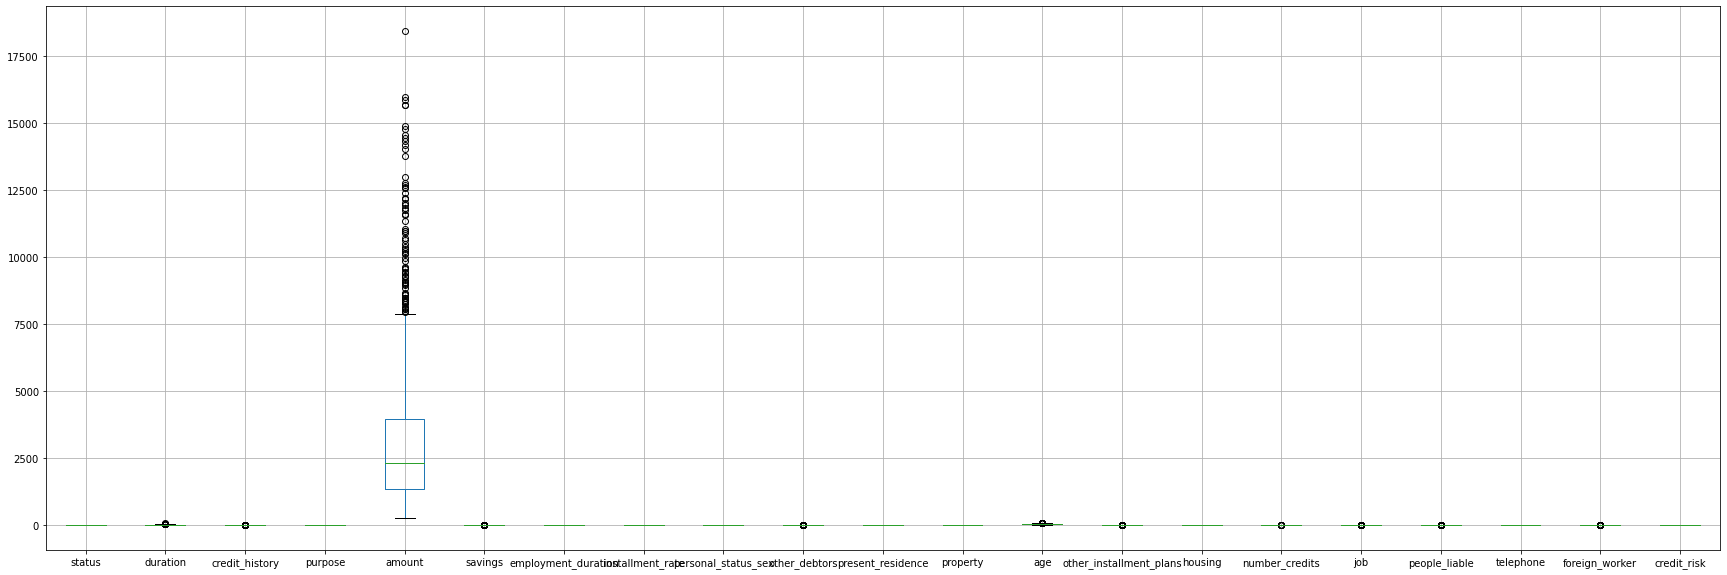

In [ ]:
#Menampilkan Boxplot
plt.figure(figsize = (30,10))
pd.DataFrame.boxplot(df)

Penghapusan outlier

In [ ]:
#Handling outlier dengan metode interquartile

def handling_outliers(data):
    for x in data.columns:
      Q1 = data[x].quantile(0.25)
      Q3 = data[x].quantile(0.75)
      intahquartile = Q3-Q1

      kicik = Q1 - (intahquartile *1.5) 
      badag = Q3 + (intahquartile * 1.5)

      data.loc[data[x] > badag , x] = badag
      data.loc[data[x] < kicik , x] = kicik

handling_outliers(df)

Visualisasi data menggunakan boxplot setelah outlier dihapus

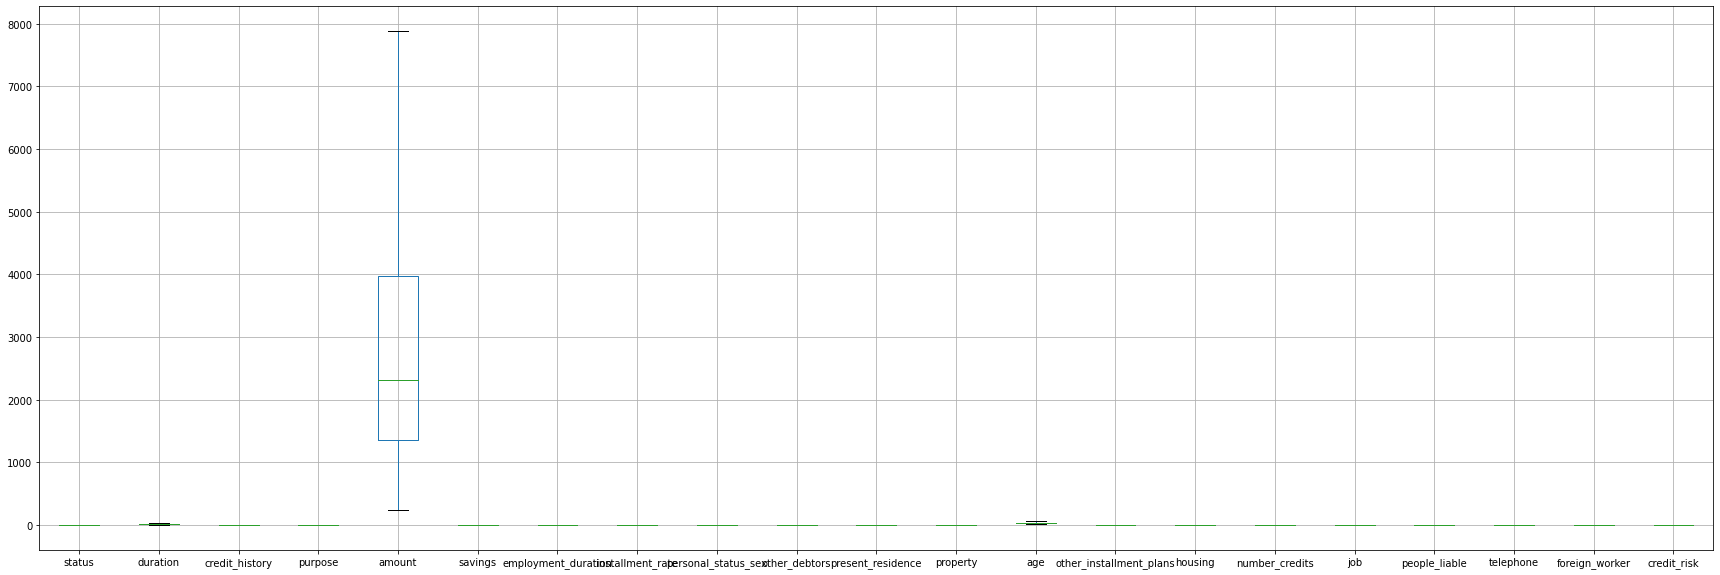

In [ ]:
plt.figure(figsize = (30,10))
pd.DataFrame.boxplot(df)

### Split Data

In [ ]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Pemodelan

Random Forest

In [ ]:
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print(f'accuracy : {accuracy_score(y_test,y_pred)*100}%')


accuracy : 76.0%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print("Classification Report")
print(classification_report(y_test, y_pred))

[[ 31  44]
 [ 16 159]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.66      0.41      0.51        75
         1.0       0.78      0.91      0.84       175

    accuracy                           0.76       250
   macro avg       0.72      0.66      0.67       250
weighted avg       0.75      0.76      0.74       250

